Seed: 30952


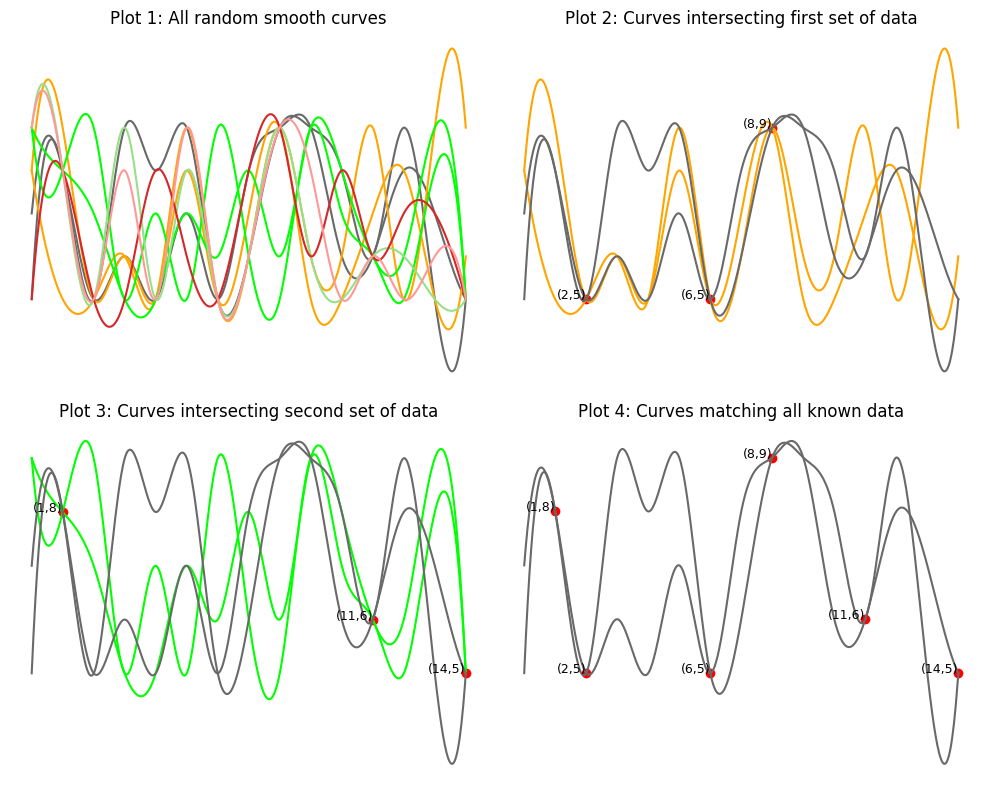

In [26]:
from scipy.interpolate import CubicSpline as CS
import numpy as np
import matplotlib.pyplot as plt

UPPER = 15
R_UPPER = 10
LOWER = 0
R_LOWER = 5
LENGTH = 15
POINTS = 6

class Curve:
    def __init__(self, points, color):
        self.color = color
        self.points = {point[0]:point[1] for point in points}
        self.array = create_y_array()
        for x, y in points:
            self.array[x] = y
        x = np.arange(LENGTH)
        self.array = CS(x,  self.array)(np.linspace(x.min(), x.max(), 500))
    
    def has_points(self, new_points):
        for x, y in new_points:
            if self.points[x] != y:
                return False
        return True
    

def create_y_array():
    return  np.random.randint(R_LOWER, R_UPPER, size=LENGTH)

def set_points_to_y_array(y_array, points):
    for x, y in points:
        y_array[x] = y
    return y_array

def plot(curves: list['Curve']):
    x_dense = np.linspace(0, LENGTH - 1, 500)
    for ind, curve in enumerate(curves):
        plt.plot(x_dense, curve.array, color=curve.color)
    plt.show()

def subplots(curves_lists: list[list['Curve']], points):
    x = np.arange(LENGTH)
    x_dense = np.linspace(0, LENGTH - 1, 500)

    fig, axes = plt.subplots(2, 2, figsize=(10, 8))
    axes[0, 0].set_title("Plot 1: All random smooth curves")
    axes[0, 1].set_title("Plot 2: Curves intersecting first set of data")
    axes[1, 0].set_title("Plot 3: Curves intersecting second set of data")
    axes[1, 1].set_title("Plot 4: Curves matching all known data")
    axes = axes.flatten()  # turn 2x2 array into 1D list of axes
    first = True
    i = 0
    for ax, curves in zip(axes, curves_lists):
        for curve in curves:
            ax.plot(x_dense, curve.array, color=curve.color)
        if first:
            first = False
        else:
            x = [points[i][j][0] for j in range(len(points[i]))]
            y = [points[i][j][1] for j in range(len(points[i]))]
            ax.scatter(x, y, color = "red")
            for xi, yi in zip(x, y):
                ax.text(xi, yi, f"({xi},{yi})", fontsize=9, ha="right")
            i += 1
        ax.axis("off") 

    # Hide unused subplots if fewer than 4 lists
    for ax in axes[len(curves_lists):]:
        ax.axis("off")

    plt.tight_layout()
    plt.show()

def get_points(indices, random_vals, start, end):
    return sorted([(indices[i], random_vals[i]) for i in range(start, end)], key= lambda x:x[0])

seed = np.random.randint(0, 2**16 - 1)  
print("Seed:", seed)

# set the seed for NumPy
np.random.seed(seed)
cmap = plt.get_cmap("tab20")
random_point_y_array = np.random.randint(R_LOWER, R_UPPER, size=POINTS)
common_points_inds = np.random.choice(np.arange(LENGTH), size= POINTS, replace=False)

subset_points_one = get_points(common_points_inds, random_point_y_array, 0, POINTS//2)
subset_points_two = get_points(common_points_inds, random_point_y_array, POINTS//2, POINTS)
all_common_points = get_points(common_points_inds, random_point_y_array, 0, POINTS)

min_subset_curves = [Curve(all_common_points, "dimgrey") for i in range(2)] 
subset_one_curves = [Curve(subset_points_one, "orange") for i in range(1, 3)]
subset_two_curves = [Curve(subset_points_two, "lime") for i in range(3, 5)]
no_point_curves = [Curve(all_common_points, cmap(i)) for i in range(5, 8)] 

subplots([
    min_subset_curves + subset_one_curves + subset_two_curves + no_point_curves,
    subset_one_curves + min_subset_curves,
    subset_two_curves + min_subset_curves,
    min_subset_curves],
    [subset_points_one, subset_points_two, all_common_points]
    )


In [4]:
import numpy as np
def log_likelihood(theta):
    """D-dimensional Rosenbrock's banana function."""
    theta = np.atleast_2d(theta)

    x, y = theta[:, :-1], theta[:, 1:]
    print(x)
    print()
    print(y)

log_likelihood(np.array([[1,2],[3,4],[5,6]]))

[[1]
 [3]
 [5]]

[[2]
 [4]
 [6]]
